GP_regression.,Value,Constraint,Prior,Tied to
sum.rbf.variance,0.276749300057,+ve,,
sum.rbf.lengthscale,19.523901041,+ve,,
sum.mul.rbf.variance,1.47266508454e-10,+ve,,
sum.mul.rbf.lengthscale,9.92394703151,+ve,,
sum.mul.linear.variances,1.4726650845e-10,+ve,,
Gaussian_noise.variance,4.75079336414e-05,+ve,,


{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x120c42790>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x120949e50>],
  [<matplotlib.lines.Line2D at 0x120c37c90>]]}

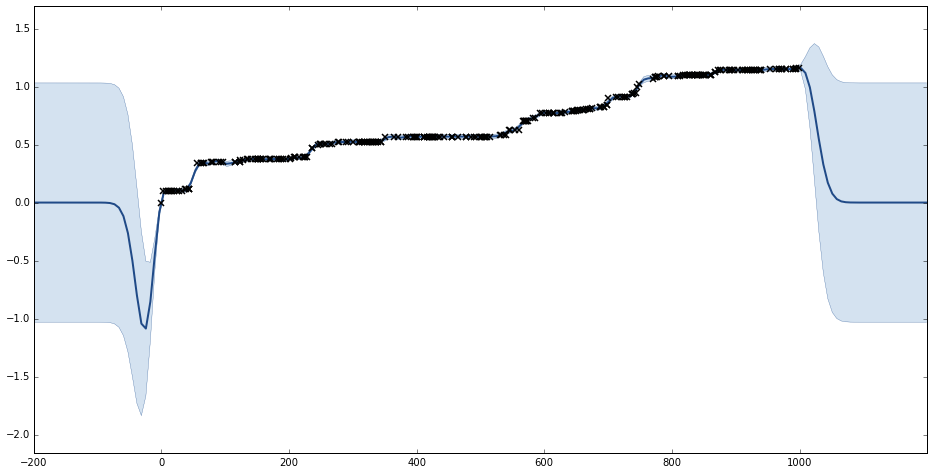

In [4]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,8)
from IPython.display import display
import numpy as np
import GPy

# Raw data
X = np.array([0, 3, 7, 10, 12, 13, 16, 17, 20, 24, 28, 33, 37, 38, 43, 43, 44, 56, 62, 63, 66, 67, 78, 80, 81, 90, 93, 96, 115, 116, 123, 123, 124, 128, 134, 136, 141, 147, 150, 151, 151, 152, 152, 154, 156, 157, 159, 169, 170, 171, 172, 181, 184, 185, 188, 191, 196, 201, 203, 208, 209, 210, 216, 222, 224, 225, 225, 229, 236, 236, 245, 248, 248, 250, 255, 258, 264, 268, 277, 279, 290, 292, 300, 309, 310, 310, 311, 314, 317, 319, 322, 322, 326, 329, 330, 331, 332, 334, 335, 337, 337, 340, 344, 345, 351, 365, 371, 383, 386, 394, 396, 398, 399, 400, 401, 411, 411, 411, 412, 416, 420, 421, 423, 424, 424, 426, 426, 427, 429, 433, 437, 443, 455, 455, 456, 465, 478, 478, 486, 490, 493, 499, 501, 502, 506, 507, 509, 510, 515, 530, 532, 537, 540, 544, 547, 554, 561, 567, 568, 568, 570, 571, 571, 572, 573, 575, 582, 586, 594, 596, 603, 607, 607, 608, 613, 613, 616, 624, 626, 627, 632, 643, 643, 645, 647, 647, 650, 651, 653, 656, 660, 660, 662, 666, 669, 671, 672, 674, 687, 688, 689, 693, 694, 698, 698, 700, 712, 716, 722, 725, 726, 726, 729, 738, 738, 739, 741, 743, 746, 748, 770, 774, 774, 775, 776, 778, 788, 788, 795, 809, 809, 812, 818, 820, 821, 823, 826, 827, 827, 828, 828, 832, 833, 836, 839, 839, 839, 840, 840, 841, 843, 846, 849, 851, 851, 852, 854, 860, 861, 861, 867, 868, 872, 876, 877, 884, 890, 891, 891, 894, 897, 903, 910, 911, 914, 917, 919, 922, 925, 925, 929, 929, 932, 937, 938, 939, 940, 953, 963, 967, 968, 972, 972, 978, 979, 989, 990, 992, 994, 995, 999])
Y = np.array([0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.12, 0.12, 0.12, 0.12, 0.12, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.354, 0.354, 0.364, 0.364, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.374, 0.38, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.4744, 0.4744, 0.4924, 0.5084, 0.5084, 0.5084, 0.5084, 0.5084, 0.5084, 0.5084, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5224, 0.5624, 0.5624, 0.5624, 0.56744148, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5688, 0.5868, 0.5868, 0.5868, 0.5868, 0.6268, 0.6268, 0.6268, 0.6268, 0.7068, 0.7068, 0.7068, 0.7068, 0.7068, 0.7068, 0.7068, 0.7068, 0.7068, 0.732, 0.732, 0.772, 0.772, 0.772, 0.772, 0.772, 0.772, 0.772, 0.772, 0.772, 0.77321075, 0.77473941, 0.77550374, 0.77932539, 0.78773302, 0.78773302, 0.78926168, 0.79079034, 0.79079034, 0.79308333, 0.79384766, 0.79537632, 0.79766931, 0.80072663, 0.80072663, 0.80225529, 0.80531261, 0.8076056, 0.80913426, 0.80989859, 0.81142725, 0.82136354, 0.822, 0.822, 0.822, 0.822, 0.84523806, 0.84523806, 0.8992052, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.938, 0.938, 0.938, 0.94063949, 0.948, 1., 1.02, 1.062, 1.082, 1.082, 1.082, 1.082, 1.092, 1.092, 1.092, 1.092, 1.092, 1.092, 1.092, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.102, 1.122, 1.122, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.142, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.152, 1.162, 1.162])

# Formatted for input to GPRegression
X = np.ndarray(shape=(len(X), 1), buffer=X, dtype=int)
Y = np.ndarray(shape=(len(Y), 1), buffer=Y, dtype=float)

# Kernel primitives
LIN = GPy.kern.Linear(input_dim=1)
SE = GPy.kern.RBF(input_dim=1)

# Mean function
mf = GPy.mappings.Linear(input_dim=1, output_dim=1)

# GP model
kernel = SE.copy() + SE.copy() * LIN.copy()
m = GPy.models.GPRegression(X, Y, kernel)

# GP model with mean function
# kernel = SE.copy()
# m = GPy.models.GPRegression(X, Y, kernel, mean_function=mf)

# Find hyperparamters and diplay
m.optimize()
display(m)
m.plot()